# modeling
## use several ML techniques to build model
   0. Data Preprocessing
   1. DT  
   2. RF  
   3. Linear Regression  
   4. Logistic Regression  
   5. SVD    

In [5]:
import pandas as pd
import csv

## Data Preprocessing

In [249]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
movie = pd.read_csv('movie.csv')

In [73]:
movie = movie.drop(columns=['Unnamed: 0'])

In [106]:
movie = movie.drop([1169, 1293, 2022], axis = 0)

In [112]:
for i in movie :
    idx = movie[i]
    print(i)
    j = movie[idx.isnull()==True]
    print(j[i].axes[0])

movieCd
Int64Index([], dtype='int64')
showTm
Int64Index([ 415,  699,  804,  841,  886,  896,  938, 1498, 1636, 1640,
            ...
            5952, 6022, 6058, 6107, 6108, 6110, 6111, 6112, 6142, 6159],
           dtype='int64', length=165)
rating
Int64Index([   0,    2,    3,    4,    7,   12,   14,   15,   16,   18,
            ...
            6173, 6175, 6179, 6180, 6181, 6182, 6188, 6189, 6193, 6194],
           dtype='int64', length=2162)
type
Int64Index([], dtype='int64')
genre_1
Int64Index([ 178,  210,  223,  226,  243,  716,  852,  977,  993,  998, 1025,
            1064, 1081, 1106, 1107, 1338, 1445, 1460, 1498, 1543, 1636, 1640,
            1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1656, 1657,
            1661, 1683, 1691, 1697, 1700, 1706, 1749, 1770, 1871, 1879, 1924,
            2023, 2042, 2064, 2093, 2119, 2120, 2136, 2167, 2188, 2240, 2243,
            2246, 2249, 2251, 2252, 2267, 2269, 2339, 2745, 2781, 2900, 3579,
            4304, 4620, 4629, 4630, 46

In [105]:
movie.drop([1169, 1293, 2022], axis = 0)

,movieCd,showTm,rating,type,genre_1,genre_2,genre_3,director_1,director_2,actor_1,...,company_4,grade,nation_1,nation_2,multi,domestic,salesAcc,scrnAcc,audiAcc,showAcc
0,19278002,107.0,NaN,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,NaN,NaN,0.0,NaN,0.0,0.0,8.570000e+05,1.0,177.0,1.0
1,19288001,110.0,8.68,0.0,3.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,1.0,NaN,0.0,0.0,2.192000e+06,3.0,1086.0,18.0
2,19308006,91.0,NaN,0.0,1.0,NaN,NaN,3.0,NaN,2.0,...,NaN,NaN,0.0,NaN,0.0,0.0,3.535000e+06,4.0,1642.0,19.0
3,19328008,93.0,NaN,0.0,4.0,NaN,NaN,4.0,5.0,4.0,...,NaN,NaN,0.0,NaN,1.0,0.0,4.104000e+06,4.0,2032.0,16.0
4,19338008,89.0,NaN,0.0,5.0,1.0,3.0,6.0,NaN,NaN,...,NaN,NaN,0.0,NaN,1.0,0.0,5.201000e+06,5.0,2579.0,25.0
5,19358005,86.0,8.16,0.0,6.0,7.0,NaN,7.0,NaN,5.0,...,NaN,NaN,2.0,NaN,1.0,0.0,2.466000e+06,4.0,1228.0,22.0
6,19358007,132.0,7.80,0.0,8.0,3.0,NaN,8.0,NaN,7.0,...,NaN,NaN,0.0,NaN,0.0,0.0,3.689000e+06,4.0,1832.0,16.0
7,19368015,109.0,NaN,0.0,1.0,3.0,NaN,9.0,NaN,10.0,...,NaN,NaN,0.0,NaN,1.0,0.0,1.279100e+07,15.0,6397.0,60.0
8,19378007,80.0,0.00,0.0,9.0,8.0,NaN,10.0,NaN,12.0,...,NaN,NaN,2.0,NaN,0.0,0.0,1.262700e+07,7.0,6344.0,34.0
9,19378023,111.0,7.83,0.0,3.0,NaN,NaN,11.0,NaN,15.0,...,NaN,NaN,0.0,NaN,1.0,0.0,7.030000e+06,8.0,3501.0,31.0


In [126]:
k = movie
for i in movie :
    idx = movie[i]
    if (i in ['showTm', 'type', 'genre_1', 'director_1', 'actor_1', 'showType_1', 'company_1', 'grade', 'nation_1', 'multi', 'domestic',
             'salesAcc', 'scrnAcc', 'audiAcc', 'showAcc', 'rating']) :   
        j = movie[idx.isnull() == True]
        for l in j[i].axes[0] :
            try :
                k = k.drop(l, axis=0)
            except :
                continue

In [183]:
mov = k.drop(['genre_2', 'genre_3', 'director_2', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
             'company_2', 'company_3', 'company_4', 'nation_2', 'showType_2', 'showType_3'], axis = 1)

In [363]:
mov['salesClass'] = -1
sc_list = []
for i in range(len(mov)) :
    sc_list.append((int)(mov.iloc[i,13]/1000000000))
mov['salesClass'] = sc_list

print(f"{mov[mov['salesClass'] == 0]['salesClass'].size / len(mov)}")

0.78531445505433


In [331]:
mov

,movieCd,showTm,rating,type,genre_1,director_1,actor_1,showType_1,company_1,grade,nation_1,multi,domestic,salesAcc,scrnAcc,audiAcc,showAcc,salesClass
37,19460021,60.0,8.56,0.0,3.0,34.0,63.0,0.0,20100481.0,6.0,3.0,0.0,1.0,9.880000e+05,3.0,494.0,24.0,0
52,19498007,100.0,6.50,0.0,9.0,41.0,40.0,0.0,20114667.0,5.0,0.0,0.0,0.0,2.056000e+06,3.0,783.0,11.0,0
63,19518015,122.0,8.96,0.0,3.0,49.0,81.0,0.0,20103668.0,8.0,0.0,1.0,0.0,2.239050e+07,15.0,9563.0,52.0,0
64,19518016,122.0,8.08,0.0,3.0,50.0,95.0,0.0,20104469.0,9.0,0.0,1.0,0.0,1.930900e+07,12.0,8954.0,44.0,0
75,19538014,115.0,6.40,0.0,3.0,17.0,111.0,0.0,20104352.0,5.0,0.0,1.0,0.0,2.019400e+07,8.0,9664.0,30.0,0
76,19538016,118.0,8.70,0.0,2.0,57.0,82.0,0.0,20102771.0,1.0,0.0,1.0,0.0,3.510100e+07,22.0,16312.0,87.0,0
81,19548002,113.0,8.35,0.0,0.0,33.0,34.0,0.0,20104469.0,5.0,0.0,1.0,0.0,2.340000e+07,19.0,11387.0,75.0,0
82,19548004,127.0,8.67,0.0,16.0,60.0,117.0,0.0,20101413.0,1.0,0.0,1.0,0.0,2.199500e+07,15.0,10559.0,52.0,0
87,19548015,91.0,8.00,0.0,9.0,63.0,112.0,0.0,20114663.0,5.0,0.0,1.0,0.0,2.182586e+07,14.0,11931.0,62.0,0
92,19548035,206.0,9.08,0.0,3.0,66.0,130.0,0.0,20101345.0,9.0,5.0,1.0,0.0,5.028000e+06,5.0,2079.0,11.0,0


In [332]:
mov.to_csv('mov.csv', index = False, encoding = 'utf-8')

ValueError: `dataset` input should have multiple elements.

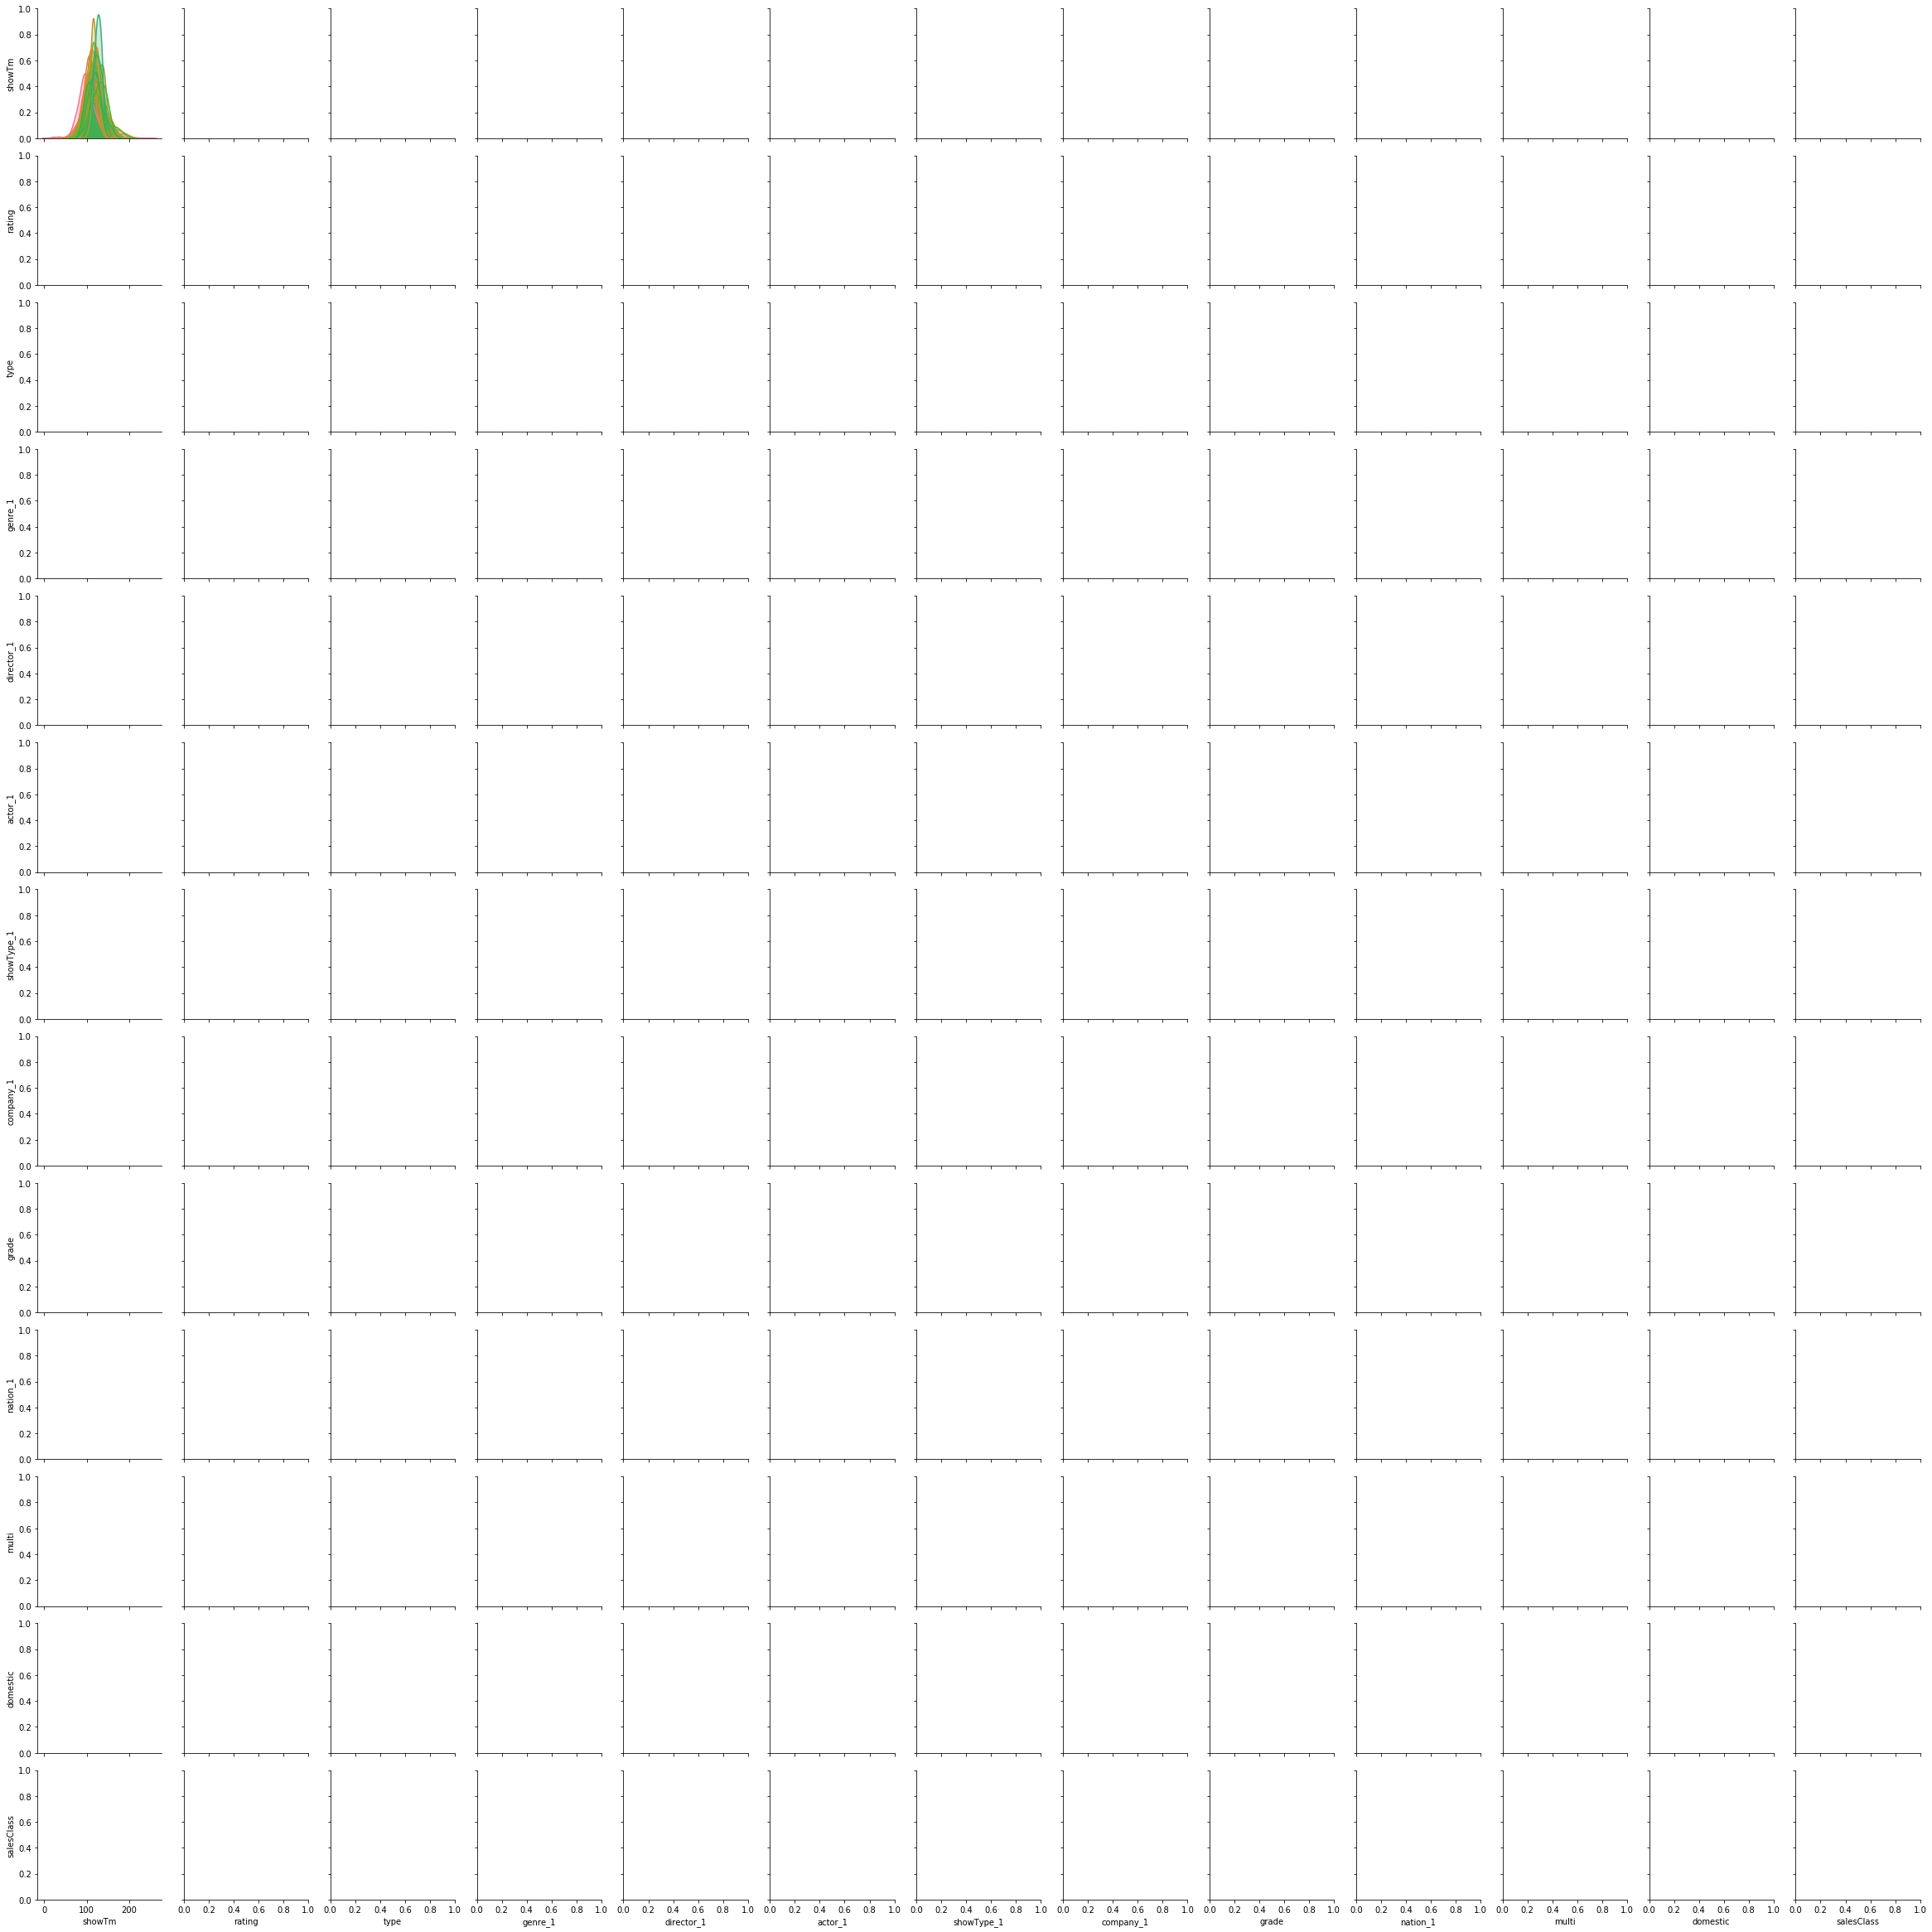

In [335]:
# df = mov.drop(columns=['movieCd', 'salesAcc', 'scrnAcc', 'audiAcc', 'showAcc'])

# sns.pairplot(df, hue = 'salesClass')
'''
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df['species'] = np.array([iris.target_names[i] for i in iris.target])

# sns.pairplot(df, hue = 'species')
# np.array([iris.target_names[i] for i in iris.target])
'''

In [349]:
from sklearn.model_selection import train_test_split

sc_list = []
for i in range(len(mov)) :
    sc_list.append((int)(mov.iloc[i,13]/100000000))
mov['salesClass']=sc_list

X = mov[mov.columns[1:13]]
y = mov[mov.columns[17]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

## Decision Tree

In [339]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [340]:
## 1. DT
# Decision Tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

movie_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', random_state = 0)
movie_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [341]:
from sklearn.metrics import accuracy_score

y_pred_tr = movie_tree.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.68


## Random Forest

In [350]:
## 2. RF
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [351]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.573
Mean accuracy score: 0.581


In [346]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns = y.columns, index = y.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [301]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [305]:
mov['salesClass']

37      0
52      0
63      0
64      0
75      0
76      0
81      0
82      0
87      0
92      0
96      0
100     0
102     0
103     0
112     0
113     0
116     0
119     0
128     0
129     0
135     0
139     0
149     0
167     0
173     0
180     0
187     0
199     0
205     0
224     0
       ..
6121    0
6123    0
6124    0
6125    0
6137    0
6138    0
6140    0
6145    0
6146    0
6147    0
6148    0
6149    0
6151    0
6152    0
6155    0
6156    0
6157    0
6163    0
6164    0
6165    0
6171    0
6172    0
6177    0
6178    0
6184    0
6185    0
6186    0
6187    0
6190    0
6192    0
Name: salesClass, Length: 3037, dtype: int64

## Linear Regression

In [379]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = mov[['showTm', 'salesAcc']]

In [394]:
X = df
y = mov['audiAcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [395]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [396]:
y_pred = regr.predict(X_test)

Coefficients: 
 [   199.91634462 127208.01635362]
Mean squared error: 5583865167.24
Variance score: 1.00


ValueError: x and y must be the same size

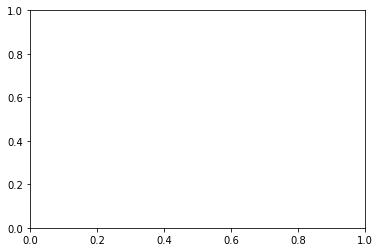

In [397]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Logistic Regression

## Support Vector Machine